In [2]:
import pandas as pd
import numpy as np


In [3]:
from plotnine import *

In [4]:
df = pd.read_csv('Base de Datos.csv', delimiter=';')

In [5]:
df.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
0,2023,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,71,2393
1,2023,2,7,PARVULARIO LAS ESPIGUITAS,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,15,530
2,2023,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,27,1078
3,2023,4,3,LICEO OCTAVIO PALMA PEREZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,69,2727
4,2023,5,1,JOVINA NARANJO FERNANDEZ,15,AYP,151,15101,ARICA,151,...,0,0,0,0,0,0,0,0,63,2414


In [6]:
df.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
       'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'DC_A', 'HH_A', 'DC_UTP', 'HH_UTP', 'DC_PDIR', 'HH_PDIR', 'DC_DIR',
       'HH_DIR', 'DC_OES', 'HH_OES', 'DC_OF', 'HH_OF', 'DC_JUTP', 'HH_JUTP',
       'DC_IG', 'HH_IG', 'DC_OR', 'HH_OR', 'DC_DIR_SOST', 'HH_DIR_SOST',
       'DC_TP_SOST', 'HH_TP_SOST', 'DC_SUP_SOST', 'HH_SUP_SOST', 'DC_SUBDIR',
       'HH_SUBDIR', 'DC_PROF_ENC', 'HH_PROF_ENC', 'DC_EDUC_TRAD',
       'HH_EDUC_TRAD', 'DC_TOT', 'HH_TOT'],
      dtype='object')

In [7]:
df.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,DC_SUP_SOST,HH_SUP_SOST,DC_SUBDIR,HH_SUBDIR,DC_PROF_ENC,HH_PROF_ENC,DC_EDUC_TRAD,HH_EDUC_TRAD,DC_TOT,HH_TOT
count,16654.0,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,...,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000,16654.000000
mean,2023.0,13463.826768,4.508767,9.245407,94.462231,9452.490393,91.813919,2.813859,1.884532,0.295905,...,0.005764,0.213042,0.048397,2.024018,0.123394,5.352408,0.041852,1.162243,16.746607,625.700492
std,0.0,10676.369828,2.872668,3.813839,37.829669,3785.177284,36.277812,1.026080,0.928506,0.456462,...,0.082537,3.277349,0.249541,10.606641,0.328899,14.313592,0.275703,9.611569,23.108197,892.985992
min,2023.0,1.000000,0.000000,1.000000,11.000000,1101.000000,11.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,5012.500000,2.000000,6.000000,61.000000,6116.000000,61.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023.0,10443.500000,5.000000,9.000000,91.000000,9117.000000,92.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,219.000000
75%,2023.0,20328.750000,7.000000,13.000000,131.000000,13119.000000,133.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,950.000000
max,2023.0,42192.000000,9.000000,16.000000,163.000000,16305.000000,151.000000,6.000000,5.000000,1.000000,...,2.000000,88.000000,7.000000,289.000000,1.000000,44.000000,13.000000,548.000000,255.000000,11192.000000


In [8]:
df.isnull().sum()

AGNO               0
RBD                0
DGV_RBD            0
NOM_RBD           30
COD_REG_RBD        0
NOM_REG_RBD_A      0
COD_PRO_RBD        0
COD_COM_RBD        0
NOM_COM_RBD        0
COD_DEPROV_RBD     0
NOM_DEPROV_RBD     0
COD_DEPE           0
COD_DEPE2          0
RURAL_RBD          0
ESTADO_ESTAB       0
DC_A               0
HH_A               0
DC_UTP             0
HH_UTP             0
DC_PDIR            0
HH_PDIR            0
DC_DIR             0
HH_DIR             0
DC_OES             0
HH_OES             0
DC_OF              0
HH_OF              0
DC_JUTP            0
HH_JUTP            0
DC_IG              0
HH_IG              0
DC_OR              0
HH_OR              0
DC_DIR_SOST        0
HH_DIR_SOST        0
DC_TP_SOST         0
HH_TP_SOST         0
DC_SUP_SOST        0
HH_SUP_SOST        0
DC_SUBDIR          0
HH_SUBDIR          0
DC_PROF_ENC        0
HH_PROF_ENC        0
DC_EDUC_TRAD       0
HH_EDUC_TRAD       0
DC_TOT             0
HH_TOT             0
dtype: int64

**3.1 Pregunta 0 (descripción de variables)**

Con el objetivo de familiarizarse y entender mejor la base de datos, se requiere realizar un analisis de esta.

1. Generar un grafico por cada una de las variables. El grafico debe tener un tıtulo descriptivo y debe mostrar
informacion clara de la variable.

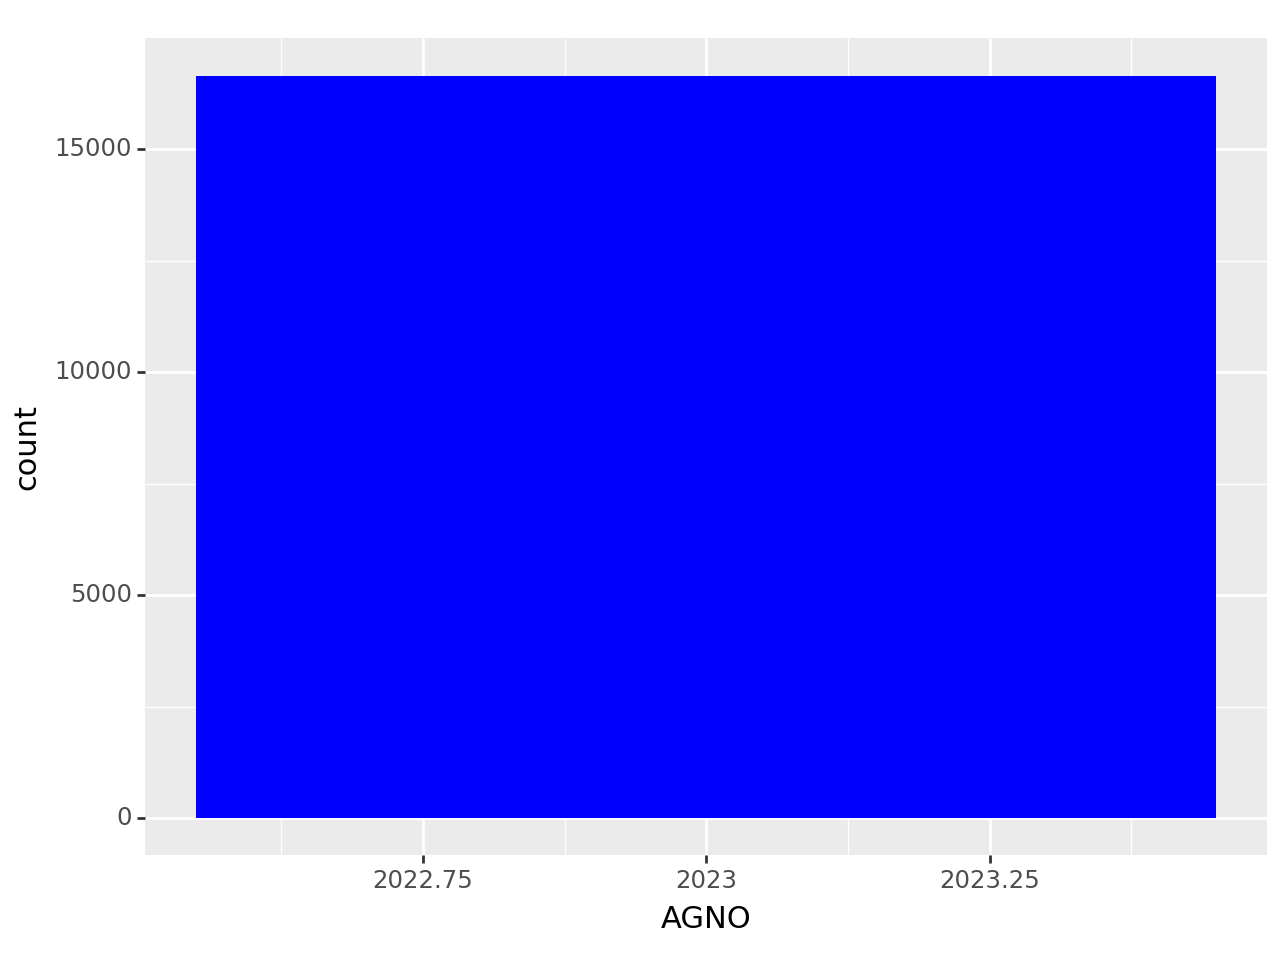

<Figure Size: (640 x 480)>

In [9]:
#1
(ggplot(df)+
 aes(x="AGNO",y="..count..")+
 geom_bar(fill="blue")
)

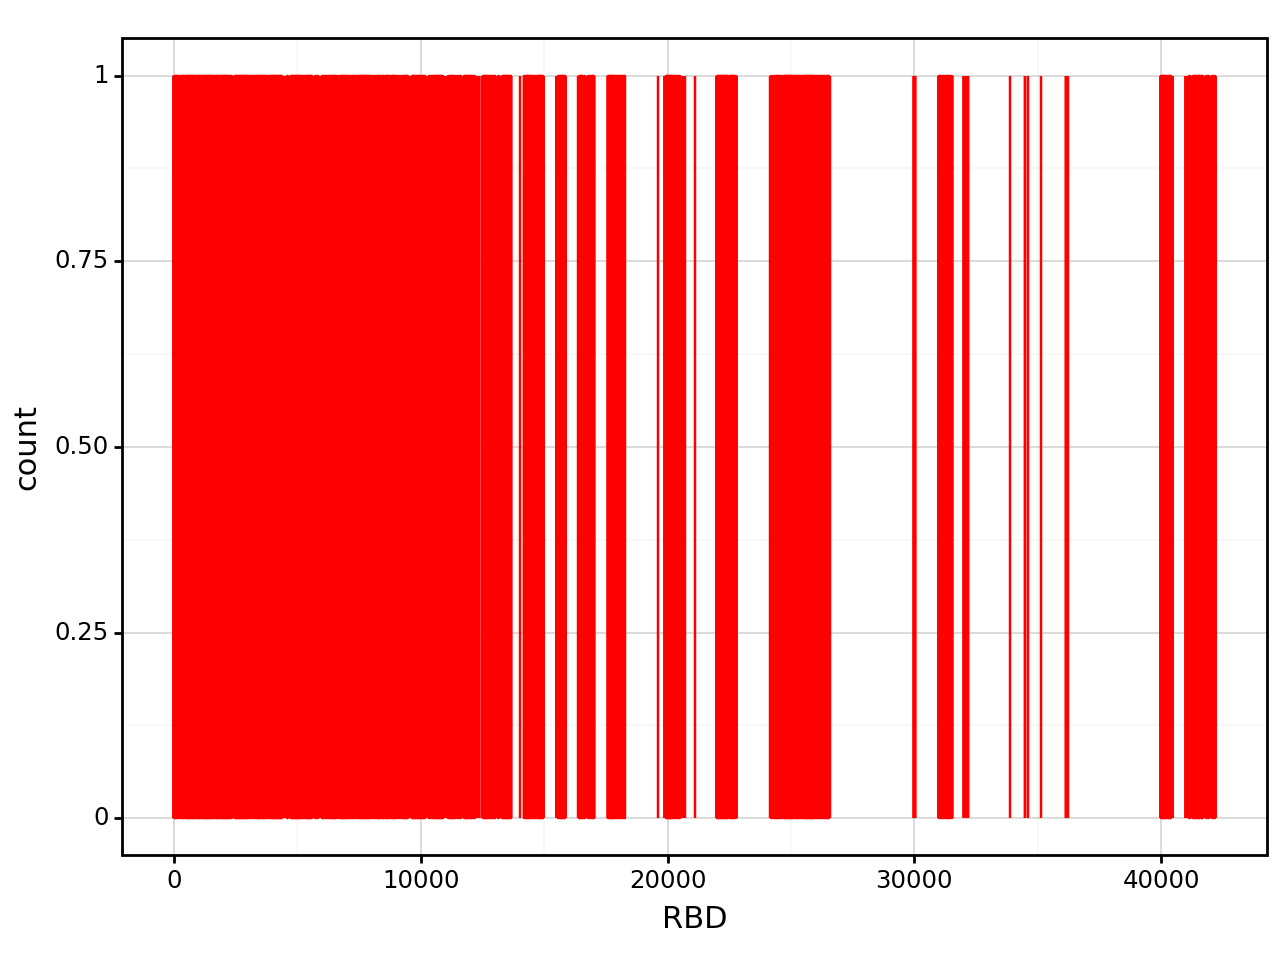

<Figure Size: (640 x 480)>

In [10]:
(ggplot(df)+
 aes(x="RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

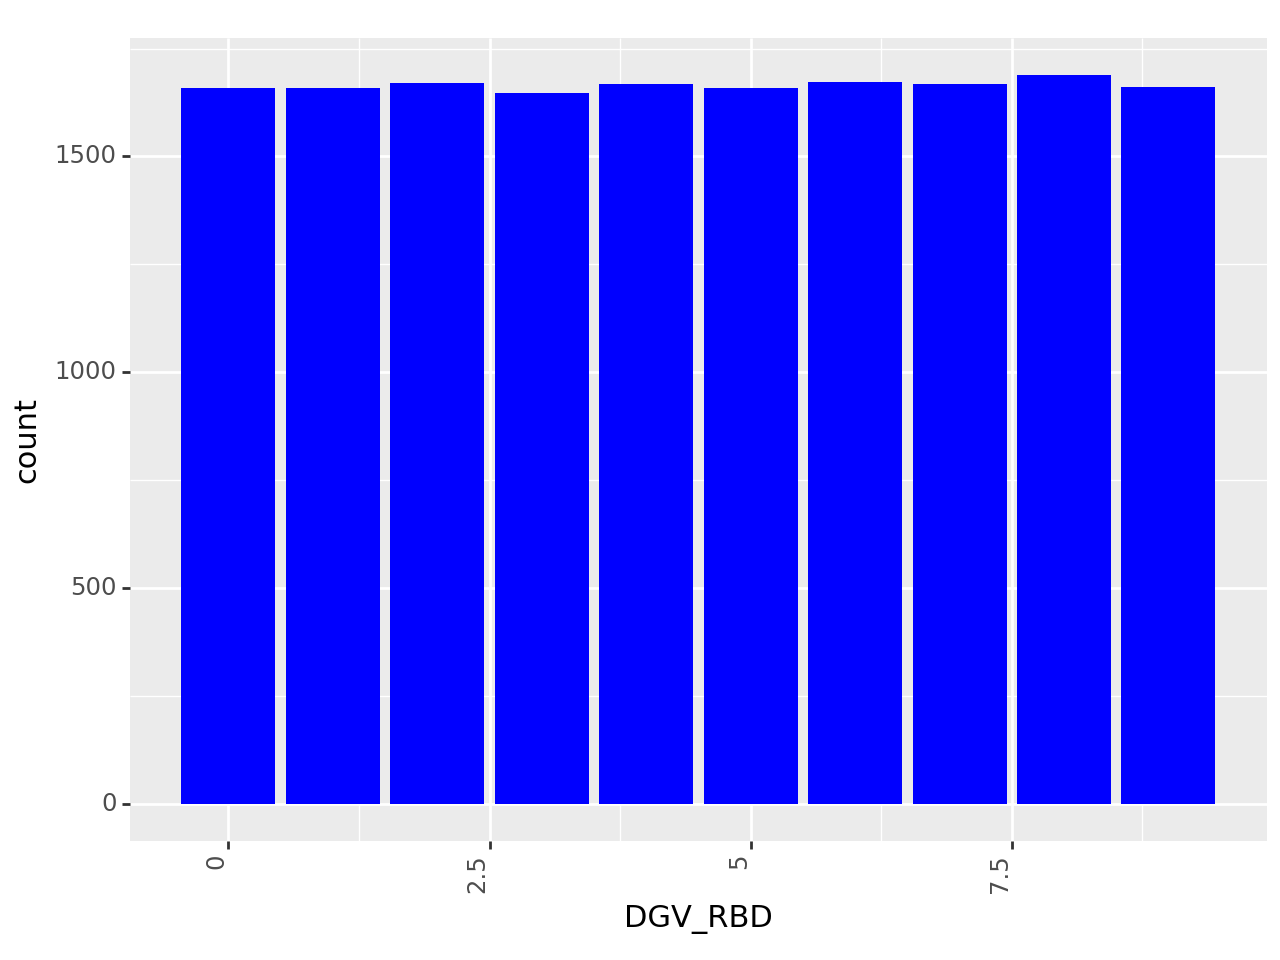

<Figure Size: (640 x 480)>

In [11]:
#3
(ggplot(df)+
 aes(x="DGV_RBD",y="..count..")+
 geom_bar(fill="blue")+
 theme(axis_text_x=element_text(angle=90,hjust=1)))


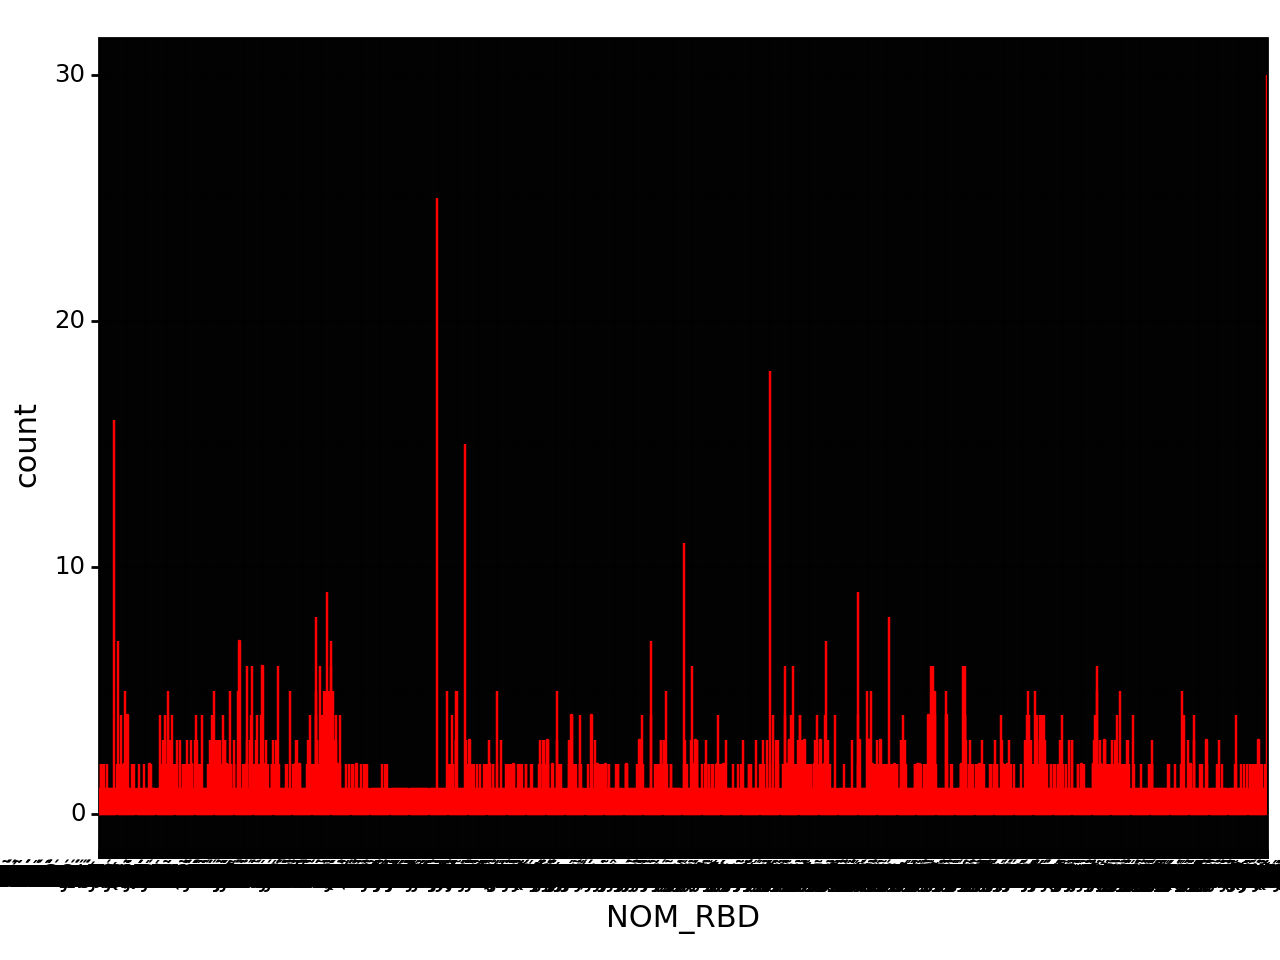

<Figure Size: (640 x 480)>

In [12]:
(ggplot(df)+
 aes(x="NOM_RBD")+
 geom_bar(color="red",fill="red")+
 theme_linedraw()
)

2. Se debe indicar por cada una de las variables su tipo (cuantitativa o cualitativa) justificando su decision. Se
debe recordar que el tipo de variable depende de su naturaleza, no del formato en el que se encuentre en la
base de datos.

**LAS VARIABLES SON DE TIPO:**

AGNO (Año de la información): Cuantitativa

RBD(Rol Base de Datos del establecimiento): Cuantitativa

DGV_RBD(Dígito verificador del RBD): Cualitativa

NOM_RBD(Nombre del establecimiento): Cualitativa

COD_REG_RBD(Código de región en que se ubica el establecimiento): Cualitativa

NOM_REG_RBD_A(Nombre de la Región abreviado): Cualitativa

COD_PRO_RBD(Código oficial de provincia en que se ubica el establecimiento): Cualitativa

COD_COM_RBD(Código oficial de comuna en que se ubica el establecimiento): Cualitativa

NOM_COM_RBD(Nombre de la comuna): Cualitativa

COD_DEPROV_RBD(Código del Departamento Provincial en que se ubica el establecimiento): Cualitativa

NOM_DEPROV_RBD(Nombre del Departamento Provincial en que se ubica el establecimiento): Cualitativa

COD_DEPE(Dependencia administrativa del Establecimiento:
1: Corporación Municipal
2: Municipal DAEM
3: Particular Subvencionado
4: Particular Pagado
5: Corporación de Administración
Delegada (DL 3166)
6: Servicio Local de Educación
7: JUNJI                                                     ): Cualitativa

COD_DEPE2(Código de Dependencia del Establecimiento (agrupado):
1: Municipal
2: Particular Subvencionado
3: Particular Pagado (o no
subvencionado)
4: Corporación de Administración
Delegada (DL 3166)
5: Servicio Local de Educación
6: JUNJI                                                               ): Cualitativa

RURAL_RBD(Área geográfica en que se ubica el establecimiento
0: Urbana
1: Rural                                                      ): Cualitativa

ESTADO_ESTAB(Estado de funcionamiento del establecimiento 
1: Funcionando
2: En Receso
3: Cerrado
4: Autorizado sin Matrícula                                  ): Cualitativa

DC_A(Total de Docentes de aula): Cuantitativa

HH_A(Horas de Contrato de los Docentes de aula): Cuantitativa

DC_UTP(Total de Docentes planta Unidad Técnico-Pedagógica): Cuantitativa

HH_UTP(Horas de Contrato de los Docentes planta Unidad Técnico-Pedagógica): Cuantitativa

DC_PDIR(Total de Docentes Planta Directiva): Cuantitativa

HH_PDIR(Horas de Contrato de los docentes de la Planta Directiva): Cuantitativa

DC_DIR(Número total de Directores(as)): Cuantitativa

HH_DIR(Horas de Contrato de los Directores(as)): Cuantitativa

DC_OES(Total de Docentes que ejercen otra función en el establecimiento): Cuantitativa

HH_OES(Horas de Contrato de los docentes que ejercen otra función en el establecimiento): Cuantitativa

DC_OF(Total de Docentes que ejercen otra función fuera del establecimiento): Cuantitativa

HH_OF(Horas de Contrato de los docentes que ejercen otra función fuera del establecimiento): Cuantitativa

DC_JUTP(Total de Jefes de Unidad TécnicoPedagógica): Cuantitativa

HH_JUTP(Horas de Contrato de los Jefes de Unidad Técnico-Pedagógica): Cuantitativa

DC_IG(Total de Inspectores Generales): Cuantitativa

HH_IG(Horas de Contrato de los Inspectores Generales): Cuantitativa

DC_OR(Total de Orientadores): Cuantitativa

HH_OR(Horas de Contrato de los Orientadores): Cuantitativa

DC_DIR_SOST(Total de docentes que cumplen funciones Directivas con el sostenedor): Cuantitativa

HH_DIR_SOST(Horas Directivas con el sostenedor): Cuantitativa

DC_TP_SOST(Total de docentes que cumplen funciones Técnico-pedagógicas con el sostenedor): Cuantitativa

HH_TP_SOST(Horas Técnico-pedagógicas con el sostenedor): Cuantitativa

DC_SUP_SOST(Total de docentes que cumplen funciones de Supervisión con el sostenedor): Cuantitativa

HH_SUP_SOST(Horas de Supervisión con el sostenedor): Cuantitativa

DC_SUBDIR(Número total de Sub Directores(as)): Cuantitativa

HH_SUBDIR(Horas de Contrato de los SubDirectores(as)): Cuantitativa

DC_PROF_ENC(Número total de Profesores(as) Encargados): Cuantitativa

HH_PROF_ENC(Horas de Contrato de los Profesores(as) Encargados): Cuantitativa

DC_EDUC_TRAD(Total de Docentes que ejercen como Educadores Tradicionales): Cuantitativa

HH_EDUC_TRAD(Horas de Contrato de los docentes que ejercen como Educadores Tradicionales): Cuantitativa

DC_TOT(Total de Docentes en el establecimiento): Cuantitativa

HH_TOT(Total de Horas de contrato en el establecimiento): Cuantitativa






**3.2 Pregunta 1 (test de independencia)**

Los docentes UTP (Unidad Tecnico Pedagogica) en Chile son profesionales de la educacion encargados de la coordinacion pedagogica y tecnica en las instituciones educativas. Se dedican a la planificacion, evaluacion y seguimiento del rendimiento academico de los estudiantes, ofrecen apoyo y orientacion a otros docentes, participan en el desarrollo profesional y gestionan aspectos curriculares. Tambien mantienen comunicacion con los padres para informarles sobre el progreso de los estudiantes, desempeñando un papel fundamental en la mejora de la calidad educativa en
el paıs.

1. Obtenga un grafico apropiado que le permita estudiar la distribucion del numero de docentes pertenecientes a
la planta UTP en los establecimientos educacionales de sus regiones. Discuta las caracterısticas mas relevantes
presentes en sus graficos

2. Al Ministerio de Educacion le preocupa que existan diferencias en el numero de docentes UTP entre los distintos tipos de establecimientos (municipales, particulares subvencionados y particulares pagados). Implemente un test de independencia chi-cuadrado que le permita concluir si existe dependencia entre el tipo de establecimiento: (solo considere municipales, particulares subvencionados y particulares pagados) y el numero
de docentes UTP. En particular:

• Reporte la tabla de frecuencias observadas y esperadas.

• Reporte el p-valor obtenido y concluya con un valor α = 0.05. Interprete sus resultados.

3. Obtenga un grafico apropiado para mostrar la distribucion del numero de docentes de planta UTP por establecimiento. Finalmente, muestre como esa distribucion cambia (o no) para los distintos establecimientos: Municipales, particulares suvencionados y particulares pagados. Incluya una breve discusion sobre si lo que observa en sus graficos concuerda con lo obtenido en la implementacion del test anterior.

**3.3 Pregunta 2 (test de bondad de ajuste)**

En Chile, las “Horas de Contrato” (variable HH_A) para los docentes de aula se refieren a la cantidad de horas que los
profesores est´an contratados para trabajar en una institucion educativa durante un perıodo especıfico, generalmente
un año escolar. La cantidad de horas de contrato puede variar segun el nivel educativo y el tipo de establecimiento
educacional.
En el contexto de un estudio educativo, se plantea la hipotesis de que las Horas de Contrato de los Docentes
de Aula siguen una distribucion exponencial. Para investigar esta afirmacion, sigua los siguientes pasos:

1. Analisis Visual: Genere un histograma de densidad para la variable en cuestion y añada en este grafico la funcion de densidad asociada a la distribucion exponencial. Disculta sobre la factibilidad de la hipotesis planteada en el estudio utilizando el histograma generado.

**Hint**: Recuerde que la densidad de la distribucion exponencial esta dada por:
f(x) = λ exp{−λx},
y que para la construccion de su grafico es razonable estimar el parametro λ usando X¯ −1 donde X¯ representa el promedio de HH_A.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Supongamos que ya tienes un DataFrame llamado df con la columna "HH_A" que contiene las horas de contrato

# Calcular el promedio de HH_A
promedio_horas = df["HH_A"].mean()

# Crear un histograma de las horas de contrato
plt.hist(df["HH_A"], bins=20, density=True, color="red", edgecolor="black", alpha=0.7, label="Histograma")

# Crear la función de densidad exponencial
x = np.linspace(0, max(df["HH_A"]), 100)
lambda_parametro = 1 / promedio_horas
densidad_exponencial = expon.pdf(x, scale=1/lambda_parametro)

# Agregar la función de densidad al gráfico
plt.plot(x, densidad_exponencial, color="blue", label="Densidad Exponencial")

# Configurar el gráfico
plt.title("Horas de Contrato")
plt.xlabel("Horas")
plt.ylabel("Densidad")
plt.legend()
plt.show()

#falta discutir sobre la factibilidad de la hipotesis 

2. Evaluacion Estadıstica: Implemente un test de hipotesis de bondad de ajuste con un nivel de significancia de α = 0.05 que le permita concluir sobre la hipotesis planteada en el estudio. Recuerde que el test de bondad
de ajuste le permite analizar si los datos se comportan como una distribucion en especıfico.

In [ ]:
import numpy as np
from scipy.stats import expon, chi2
from scipy.stats import chisquare


# Estimar el parámetro λ (inversa de la media de HH_A)
lambda_estimado = 1 / df["HH_A"].mean()

# Crear los bins para el histograma
bins = np.linspace(0, max, 10)

# Calcular las frecuencias observadas en cada bin
frecuencias_obs, _ = np.histogram((df["HH_A"]), bins=bins)

# Calcular las frecuencias espera(df["HH_A"])das bajo la distribución exponencial
frecuencias_exp = len(df["HH_A"]) * np.diff(chi2.cdf(bins, df=1))

# Realizar la prueba de chi-cuadrado
stat, p_valor = chisquare(f_obs=frecuencias_obs, f_exp=frecuencias_exp)

# Imprimir los resultados
print(f"Estadístico de prueba chi-cuadrado: {stat}")
print(f"Valor p: {p_valor}")

# Comparar el valor p con el nivel de significancia
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución exponencial.")
else:
    print("No se puede rechazar la hipótesis nula. Los datos siguen una distribución exponencial.")


3.4 Pregunta 3 (regresion lineal simple y multiple)

1. Regresion lineal simple: Implemente un modelo de regresion lineal simple que le permita modelar las
Horas de Contrato de los Docentes de Aula (variable HH_A) en funcion del Total de Docentes de aula (variable
DC_A).
Los pasos que debera realizar para dar respuesta a esta pregunta son:

(a) Obtenga la correlacion entre las variables involucradas.

(b) Visualize la relacion entre las variables

(c) Separe los datos en conjuntos de datos de entrenamiento y testeo. Luego ajuste el modelo de regresion.

(d) Muestre en una tabla los coeficientes obtenidos (Intercepto y pendiente). Interprete sus resultados.

(e) Visualize el modelo de regresion utilizando los coeficientes encontrados en el paso anterior.

(f) Obtenga y comente el coeficiente de determinacion obtenido.

(g) Evalue su modelo utilizando los datos del set de testeo. 
Para esto, calcule el MSE y RMSE predictivos
(error cuadratico medio y raız del error cuadratico medio). ¿Que significan los valores obtenidos?

2. Regresion lineal multiple: En esta pregunta se le pide que implemente un modelo de regresion lineal
multiple para modelar las Horas de Contrato de los Docentes de Aula (variable HH_A) en funcion del Total
de Docentes de aula (variable DC_A) y de tres variables mas que usted debe escoger. Para escoger
estas variables usted debe usar criterios claros y objetivos (por ejemplo, puede elegir las variables que mas se
correlacionan con la variable dependiente).

Utilizando la misma separacion de entrenamiento y testing realizada en el ıtem anterior responda: ¿Que
impacto tienen las variable adicionales en el rendimiento de su modelo? Comente en funcion de los nuevas
metricas obtenidas (error cuadratico medio y R2).

**3.5 Pregunta 4 (clasificacion y validacion)**

En esta pregunta se le pide que implemente dos modelos de clasificacion: Support Vector Machine y Regresion
Logıstica. El objetivo es generar un modelo que prediga si la variable Horas de Contrato de los Docentes de Aula
(variable HH A) es mayor a 160 horas. Los modelos deben ser implementados usando validacion simple y K-Fold
Cross validation. Los pasos para responder la pregunta son:

1. Genere una nueva variable a partir de Horas de Contrato de los Docentes de Aula (variable HH A) que tome
el valor de 1 si supera las 160 horas, y tenga valor 0 si es menor o igual a este valor.

2. Seleccione la variable Total de Docentes de aula (variable DC A) y las tres mejores variables. Para escoger
estas variables usted debe justificar usando criterios claros y objetivos.

3. Genere un nuevo dataframe que contenga: la variable Total de Docentes de aula, las 3 variables que escogio
y la nueva variable generada

4. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion simple. Obtenga los
valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los resultados de
estas metricas.

5. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion simple.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Explique como interpretarıa los
resultados de estas metricas.

6. Mencione la principal deficiencia de aplicar validacion simple aplicada para este caso.

7. Con el data frame obtenido, aplique el modelo SVM utilizando la tecnica de validacion cruzada. Obtenga
los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra sobre
entrenado.

8. Con el data frame obtenido, aplique el modelo Regresion Logıstica utilizando la tecnica de validacion cruzada.
Obtenga los valores de las metricas: accuracy, recall, precision y f1 score. Determine si su modelo se encuentra
sobre entrenado.